In [2]:
import os
from tqdm import tqdm, trange
import cv2
import numpy as np
import random
from random import shuffle
from PIL import Image
import time
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import torch


In [ ]:
def pred_image_generator():
    PRED_DATA_PATH = "D:\Assignments\ML Lab\ML_LAB_6\Data\seg_pred\seg_pred"
    images = []
    img_paths = []
    for folder in os.listdir(PRED_DATA_PATH):
        image_path = os.path.join(PRED_DATA_PATH, folder)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (32, 32))
        images.append(image)
        img_paths.append(image_path)
    return images, img_paths


In [39]:
pred_images, image_paths = pred_image_generator()


(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 

In [5]:
def load_data():
    datasets = [
        'D:\Assignments\ML Lab\ML_LAB_6\Data\seg_train\seg_train',
        'D:\Assignments\ML Lab\ML_LAB_6\Data\seg_test\seg_test'
    ]

    class_names = ['mountain', 'street',
                   'glacier', 'buildings', 'sea', 'forest']

    class_names_label = {class_name: i for i,
                         class_name in enumerate(class_names)}

    results = []
    IMAGE_SIZE = (32, 32)
    for dataset in datasets:
        images = []
        labels = []
        print("Loading {}".format(dataset))
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            for f in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(os.path.join(dataset, folder), f)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                images.append(image)
                labels.append(label)
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        results.append((images, labels))
    return results


In [6]:
x = load_data()


Loading D:\Assignments\ML Lab\ML_LAB_6\Data\seg_train\seg_train


100%|██████████| 2382/2382 [00:27<00:00, 85.91it/s] 


Loading D:\Assignments\ML Lab\ML_LAB_6\Data\seg_test\seg_test


100%|██████████| 501/501 [00:03<00:00, 152.16it/s]


In [7]:
(train_images, train_labels), (test_images, test_labels) = x


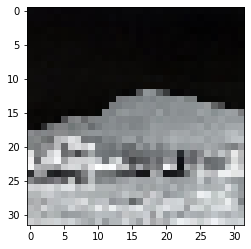

In [8]:
plt.imshow((train_images[0] * 255).astype(np.uint8))


In [9]:
train_images, train_labels = shuffle(
    train_images, train_labels, random_state=1234)


4


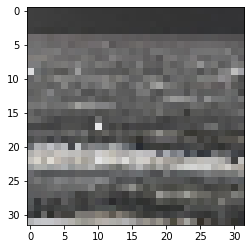

In [10]:
plt.imshow((train_images[1] * 255).astype(np.uint8))
print(train_labels[1])


In [11]:
class DNN:
    def __init__(self, sizes=[3072, 32, 16, 6], epochs=10, learning_rate=0.001, keep_rate=0.85) -> None:
        self.sizes = sizes
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.history = []
        self.keep_rate = keep_rate
        self.params = {}
        for i in range(len(self.sizes)-1):
            self.params["W"+str(i+1)] = np.random.randn(self.sizes[i+1],self.sizes[i]) * np.sqrt(1/self.sizes[i+1])
            
    def forward_pass(self, x_train):
        params = self.params
        total_layers = len(self.sizes)
        params['A0'] = x_train
        for i in range(total_layers-1):
            params["Z"+str(i+1)] = np.dot(params["W"+str(i+1)],params["A"+str(i)])
            params["A"+str(i+1)] = self.sigmoid(params["Z"+str(i+1)])
        params['Z'+str(total_layers-1)] = np.dot(params['W'+str(total_layers-1)], params["A"+str(total_layers-2)])
        params['A'+str(total_layers-1)] = self.softmax(params['Z'+str(total_layers-1)])
        return params["A"+str(total_layers-1)]

    def sigmoid(self, x, derivative=False):
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1+np.exp(-x))

    def iterate_minibatches(self, inputs, targets, batchsize, shuffle=False):
        assert len(inputs) == len(targets)
        if shuffle:
            indices = np.random.permutation(len(inputs))
        for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
            if shuffle:
                excerpt = indices[start_idx:start_idx + batchsize]
            else:
                excerpt = slice(start_idx, start_idx + batchsize)
            yield inputs[excerpt], targets[excerpt]

    def softmax(self, x, derivative=False):
        exps = np.exp(x-x.max())
        if derivative:
            return exps/np.sum(exps, axis=0) * (1-exps/np.sum(exps, axis=0))
        return exps/np.sum(exps, axis=0)

    def backward_pass(self, y_train, output):
        params = self.params
        total_layers = len(self.sizes)
        change_w = {}
        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z'+str(total_layers-1)], derivative=True)
        change_w['W'+str(total_layers-1)] = np.outer(error,params['A'+str(total_layers-2)])
        for i in range(total_layers, 2, -1):
            error = np.dot(params['W'+str(i-1)].T, error) * self.sigmoid(params['Z'+str(i-2)], derivative=True)
            change_w['W'+str(i-2)] = np.outer(error, params['A'+str(i-3)])
        return change_w

    def update_weights(self, change_w):
        for key, val in change_w.items():
            self.params[key] -= self.learning_rate * val

    def train(self, train_list, train_labels):
        for i in range(self.epochs):
            start_time = time.time()
            for x in zip(train_list, train_labels):
                values = x[0]
                inputs = (np.asfarray(values)/255.0)
                targets = np.zeros(6)
                targets[x[1]] = 0.99
                output = self.forward_pass(inputs.flatten())
                y_pred = np.argmax(output)
                y_actual = np.argmax(targets)
                self.history.append(y_pred == y_actual)
                change_w = self.backward_pass(targets, output)
                self.update_weights(change_w)

            train_acc = np.mean(self.history)
            self.history.clear()
            print('Train Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
                i+1, time.time() - start_time, train_acc * 100
            ))

    def predict(self, test_data, test_labels):
        predictions = []
        for x in zip(test_data, test_labels):
            values = x[0]
            inputs = (np.asfarray(values)/255.0)
            targets = np.zeros(6)
            targets[x[1]] = 0.99
            output = self.forward_pass(inputs.flatten())
            pred = np.argmax(output)
            actual = np.argmax(targets)
            predictions.append(pred == actual)
        return np.mean(predictions)

    def predict_single(self, index):
        class_names = ['mountain', 'street',
                       'glacier', 'buildings', 'sea', 'forest']
        inputs = (np.asfarray(pred_images[index])/255.0)
        output = self.forward_pass(inputs.flatten())
        image = cv2.imread(image_paths[index])
        plt.imshow(image)
        plt.title(f'image class predicted: {class_names[np.argmax(output)]}')


In [29]:
model = DNN(epochs=50, learning_rate=0.05, sizes=[3072, 32, 16, 12, 8, 6])
model.train(train_images, train_labels)


Train Epoch: 1, Time Spent: 7.82s, Accuracy: 16.55%
Train Epoch: 2, Time Spent: 7.00s, Accuracy: 17.58%
Train Epoch: 3, Time Spent: 7.16s, Accuracy: 18.08%
Train Epoch: 4, Time Spent: 7.33s, Accuracy: 19.32%
Train Epoch: 5, Time Spent: 7.03s, Accuracy: 21.97%
Train Epoch: 6, Time Spent: 6.92s, Accuracy: 26.38%
Train Epoch: 7, Time Spent: 7.04s, Accuracy: 30.66%
Train Epoch: 8, Time Spent: 7.29s, Accuracy: 33.96%
Train Epoch: 9, Time Spent: 6.99s, Accuracy: 35.86%
Train Epoch: 10, Time Spent: 7.09s, Accuracy: 37.86%
Train Epoch: 11, Time Spent: 7.51s, Accuracy: 39.09%
Train Epoch: 12, Time Spent: 7.27s, Accuracy: 40.01%
Train Epoch: 13, Time Spent: 7.28s, Accuracy: 41.09%
Train Epoch: 14, Time Spent: 7.24s, Accuracy: 41.80%
Train Epoch: 15, Time Spent: 7.27s, Accuracy: 42.57%
Train Epoch: 16, Time Spent: 7.24s, Accuracy: 43.37%
Train Epoch: 17, Time Spent: 7.26s, Accuracy: 44.29%
Train Epoch: 18, Time Spent: 7.25s, Accuracy: 45.72%
Train Epoch: 19, Time Spent: 8.16s, Accuracy: 47.21%
Tr

In [30]:
model.predict(test_images, test_labels)


0.5173333333333333

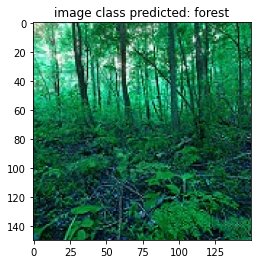

In [33]:
model.predict_single(17)


## Using Standard Library


In [15]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd


In [16]:
train_path = '../input/intel-image-classification/seg_train/seg_train'
valid_path = '../input/intel-image-classification/seg_test/seg_test'


In [17]:
from keras.applications.vgg16 import VGG16
IMAGE_SIZE = [32, 32]
vgg = VGG16(input_shape=IMAGE_SIZE + [3],
            weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = tf.keras.layers.Flatten()(vgg.output)
prediction = tf.keras.layers.Dense(6, activation='softmax')(x)


In [18]:
model = tf.keras.models.Model(inputs=vgg.input, outputs=prediction)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])


In [20]:
train_data = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_data.flow_from_directory(
    'D:\Assignments\ML Lab\ML_LAB_6\Data\seg_train\seg_train', batch_size=128, target_size=(32, 32), class_mode='categorical')


Found 14034 images belonging to 6 classes.


In [21]:
test_data = ImageDataGenerator(rescale=1./255)
testing_set = test_data.flow_from_directory(
    'D:\Assignments\ML Lab\ML_LAB_6\Data\seg_test\seg_test', batch_size=128, target_size=(32, 32), class_mode='categorical')


Found 3000 images belonging to 6 classes.


In [22]:
cnn = model.fit(training_set, validation_data=testing_set, epochs=2,
                steps_per_epoch=len(training_set), validation_steps=len(testing_set))


Epoch 1/2
110/110 [==============================] - 36s 325ms/step - loss: 0.9483 - accuracy: 0.6472 - val_loss: 0.8248 - val_accuracy: 0.7003
Epoch 2/2
110/110 [==============================] - 36s 324ms/step - loss: 0.7711 - accuracy: 0.7144 - val_loss: 0.7847 - val_accuracy: 0.7153
